In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import math

1) Importe el dataset a un notebook. Observe que está en formato .dta; utilice el método adecuado. (Nota: es posible que en los argumentos del método deba incluir, además del directorio del archivo, 'convert_categoricals=False').

In [2]:
pd.set_option('display.max.columns',None)
pd.set_option('display.max.rows',None)




In [3]:
df_upersonas=pd.read_excel('Upersonas.xlsx')

2) Filtre el dataset seleccionando únicamente siete variables que considere relevantes para explicar la variable 'vr_salario'. (Una ayuda: edad, sexo y estado_civil, deben ser las primeras tres). Justifique la selección.

In [4]:
df_upersonas.head()

Unnamed: 0  ola  consecutivo       llave  hogar   llave_n16  hogar_n16  \
0           0    3       111001  11100101.0    1.0  1110010101          1   
1           1    3       111001         NaN    NaN  1110010101          1   
2           2    3       111001         NaN    NaN  1110010101          1   
3           3    3       111001         NaN    NaN  1110010101          1   
4           4    3       111003  11100301.0    1.0  1110030501          1   

   orden  seguimiento  llave_ID_lb      llaveper  llaveper_n16  edad  \
0      1            1   11100101.0  1.110010e+09  111001010101    60   
1      6            2          NaN           NaN  111001010106    40   
2      7            2          NaN           NaN  111001010107    67   
3      8            2          NaN           NaN  111001010108    22   
4      1            1   11100301.0  1.110030e+09  111003050101    53   

   edad_meses  edad_tot_meses  sexo  parentesco  id_dpto_nac  id_mpio_nac  \
0           9             NaN     2           1          NaN          NaN   
1           2             NaN     2           3         14.0        193.0   
2           7             NaN     1          11          2.0        120.0   
3           0             NaN     1           5         21.0        102.0   
4           9             NaN     2           1         17.0        164.0   

  pais_nac  nac_dia  nac_mes  nac_ano  embarazada  estado_civil  vive_conyuge  \
0      NaN       15        5     1955         NaN             3           NaN   
1      NaN       22       12     1975         2.0             2           1.0   
2      NaN       28        7     1948         NaN             2           1.0   
3      NaN       27        2     1994         NaN             5           NaN   
4      NaN       10        5     1962         NaN             4           NaN   

   orden_conyuge  fecha_edad  mes_unionm  ano_unionm  edad_unionm  etnia  \
0            NaN         NaN         NaN         NaN          NaN    NaN   
1            7.0         NaN         NaN         NaN          NaN    6.0   
2            6.0         NaN         NaN         NaN          NaN    6.0   
3            NaN         NaN         NaN         NaN          NaN    6.0   
4            NaN         NaN         NaN         NaN          NaN    8.0   

   padre_vive  orden_padre  madre_vive  orden_madre  parent_inform  \
0           3          NaN           2          NaN            NaN   
1           2          NaN           1          1.0            NaN   
2           3          NaN           3          NaN            NaN   
3           2          NaN           1          6.0            NaN   
4           2          NaN           2          NaN            NaN   

   inform_orden  novedad_perso  afiliacion  beneficiario_sss  afilia_porque  \
0           NaN              0         1.0               NaN            3.0   
1           NaN             32         NaN               NaN            NaN   
2           NaN             21         NaN               NaN            NaN   
3           NaN             29         NaN               NaN            NaN   
4           NaN             29         1.0               NaN            4.0   

   afiliado_porque  beneficiario_orden afilia_cual  no_afiliado  t_noafiliado  \
0              NaN                 NaN                      2.0           NaN   
1              NaN                 NaN         NaN          NaN           NaN   
2              NaN                 NaN         NaN          NaN           NaN   
3              NaN                 NaN         NaN          NaN           NaN   
4              NaN                 NaN                      2.0           NaN   

   prepagada  cotizando  rzn_nocotiza cotiza_cual  vr_rec_pension  ceguera  \
0        2.0        2.0           5.0                         NaN      2.0   
1        NaN        NaN           NaN         NaN             NaN      NaN   
2        NaN        NaN           NaN         NaN             NaN      NaN   
3    

In [5]:
  df_salario=df_upersonas[['vr_salario', 'edad', 'sexo', 'estado_civil', 'etnia','anos_superior', 'anos_trabaja','horas_normal']]
df_salario.head()

vr_salario  edad  sexo  estado_civil  etnia  anos_superior  anos_trabaja  \
0         NaN    60     2             3    NaN            1.0           2.0   
1         NaN    40     2             2    6.0            NaN           NaN   
2         NaN    67     1             2    6.0            NaN           NaN   
3         NaN    22     1             5    6.0            NaN           NaN   
4         NaN    53     2             4    8.0            NaN           NaN   

   horas_normal  
0          30.0  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [6]:
df_salario['log_salario']=np.log(df_salario['vr_salario'])

<ipython-input-6-493f967f5372>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salario['log_salario']=np.log(df_salario['vr_salario'])


3) Una vez filtrada realice un análisis exploratorio corto de la información.

In [7]:
df_salario.describe()

vr_salario          edad          sexo  estado_civil        etnia  \
count  2.692000e+03  19298.000000  19298.000000  19298.000000  2858.000000   
mean   1.033013e+06     31.736605      1.531920      3.471707     6.815255   
std    9.058483e+05     20.657975      0.498993      1.677951     1.350981   
min    5.000000e+03      0.000000      1.000000      1.000000     1.000000   
25%    6.000000e+05     14.000000      1.000000      2.000000     6.000000   
50%    7.600000e+05     29.000000      2.000000      5.000000     7.000000   
75%    1.200000e+06     48.000000      2.000000      5.000000     8.000000   
max    1.100000e+07     96.000000      2.000000      5.000000     8.000000   

       anos_superior  anos_trabaja  horas_normal  log_salario  
count    1115.000000   4017.000000   5374.000000  2692.000000  
mean        3.584753      2.325118     45.182732    13.526456  
std         2.512579      2.794568     20.330841     0.908653  
min         0.000000      0.000000      1.000000     8.517193  
25%         2.000000      0.000000     35.000000    13.304685  
50%         3.000000      1.000000     48.000000    13.541074  
75%         5.000000      4.000000     56.000000    13.997832  
max        19.000000     12.000000    108.000000    16.213406

<AxesSubplot:xlabel='vr_salario', ylabel='Count'>

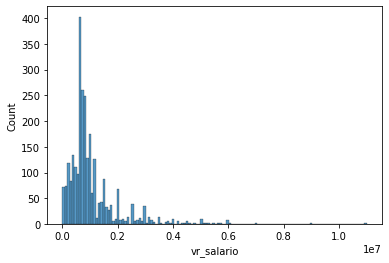

In [8]:
sns.histplot(data=df_salario,x='vr_salario')

edad: el efecto de la edad en los salarios es muy evidente, ya que a mayor edad tiene más probabilidad de tener un mayor salario ya sea por medio de experiencia o educación, por otro lado, esta variable tiene un comportamiento diferente ya que habrá un punto de edad donde empieza a disminuir por las condiciones laborales.

<AxesSubplot:xlabel='edad', ylabel='Count'>

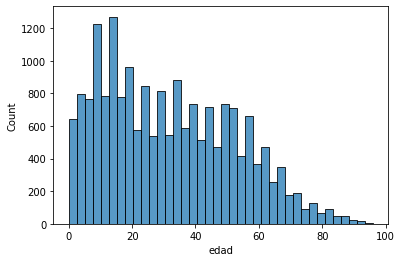

In [9]:
sns.histplot(data=df_salario,x='edad')

In [24]:
df_salario=df_salario.replace(to_replace={'sexo':{1 :'M'}},value=None)
df_salario=df_salario.replace(to_replace={'sexo':{2:'F'}},value=None)

<AxesSubplot:xlabel='sexo', ylabel='Count'>

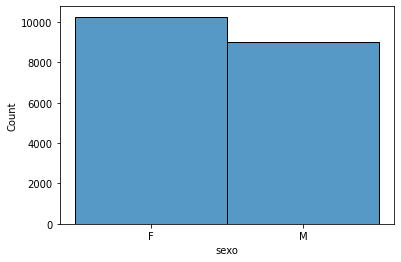

In [25]:
sns.histplot(data=df_salario,x='sexo')

sexo: es una variable dummy la cual hace referencia si la persona encuestada es hombre o mujer, esta variable está íntimamente relacionada con la variable salarios ya que estudios económicos revelan que las mujeres ganan menos salarios a comparación de los hombres.

In [23]:
df_salario=df_salario.replace(to_replace={'estado_civil':{1 :'unionlibre'}},value=None)
df_salario=df_salario.replace(to_replace={'estado_civil':{2:'casado'}},value=None)
df_salario=df_salario.replace(to_replace={'estado_civil':{3:'separado'}},value=None)
df_salario=df_salario.replace(to_replace={'estado_civil':{4:'viudo'}},value=None)
df_salario=df_salario.replace(to_replace={'estado_civil':{5:'soltero'}},value=None)
df_salario


vr_salario  edad  sexo estado_civil  etnia  anos_superior  \
0             NaN    60     2     separado    NaN            1.0   
1             NaN    40     2       casado    6.0            NaN   
2             NaN    67     1       casado    6.0            NaN   
3             NaN    22     1      soltero    6.0            NaN   
4             NaN    53     2        viudo    8.0            NaN   
5             NaN    25     1      soltero    8.0            NaN   
6             NaN    22     2      soltero    8.0            NaN   
7       1026000.0    30     2   unionlibre    NaN            NaN   
8             NaN     6     1      soltero    NaN            NaN   
9        750000.0    31     1   unionlibre    NaN            6.0   
10            NaN     3     2      soltero    NaN            NaN   
11            NaN    40     2   unionlibre    NaN            NaN   
12            NaN    12     2      soltero    NaN            NaN   
13            NaN    28     1   unionlibre    8.0            NaN   
14            NaN    29     2       casado    NaN            NaN   
15            NaN    13     1      soltero    NaN            NaN   
16            NaN     7     2      soltero    NaN            NaN   
17       689000.0    32     1       casado    NaN            NaN   
18      1500000.0    37     1       casado    NaN            NaN   
19            NaN    38     2       casado    NaN            NaN   
20            NaN     7     1      soltero    NaN            NaN   
21            NaN     4     2      soltero    NaN            NaN   
22            NaN    51     1   unionlibre    NaN            NaN   
23            NaN    48     2   unionlibre    8.0            NaN   
24            NaN    22     1      soltero    NaN            NaN   
25       700000.0    59     1       casado    NaN            NaN   
26            NaN    59     2       casado    NaN            NaN   
27            NaN    28     2       casado    NaN            NaN   
28            NaN     5     1      soltero    NaN            NaN   
29            NaN    28     1       casado    NaN           12.0   
30            NaN    38     2       casado    NaN            NaN   
31            NaN    41     1       casado    NaN            NaN   
32            NaN    21     1      soltero    NaN            NaN   
33            NaN    19     1      soltero    NaN            NaN   
34            NaN    16     2      soltero    NaN            NaN   
35            NaN     4     1      soltero    NaN            NaN   
36      1100000.0    35     2   unionlibre    NaN            NaN   
37            NaN    16     1      soltero    NaN            NaN   
38            NaN     7     1      soltero    NaN            NaN   
39            NaN    66     2        viudo    NaN            NaN   
40            NaN    46     1   unionlibre    8.0            1.0   
41       500000.0    23     2   unionlibre    NaN            NaN   
42            NaN     7     1      soltero    NaN            NaN   
43            NaN    26     1   unionlibre    8.0            NaN   
44            NaN     0     1      soltero    8.0            NaN   
45            NaN    37     1   unionlibre    NaN            NaN   
46       700000.0    32     2   unionlibre    NaN            NaN   
47            NaN    16     1      soltero    NaN            NaN   
48            NaN    13     1      soltero    NaN            NaN   
49            NaN    56     1       casado    NaN            NaN   
50       300000.0    50     2       casado    NaN            NaN   
51            NaN    28     1      soltero    NaN            NaN   
52            NaN    27     1      soltero    NaN            NaN   
53       600000.0    31     1   unionlibre    NaN            NaN   
54            NaN    27     2   unionlibre    NaN            4.0   
55            NaN     5     1      soltero    NaN            NaN   
56            NaN     0     2      soltero    5.0            NaN   
57            NaN    56     2     separado    NaN            Na

<AxesSubplot:xlabel='estado_civil', ylabel='Count'>

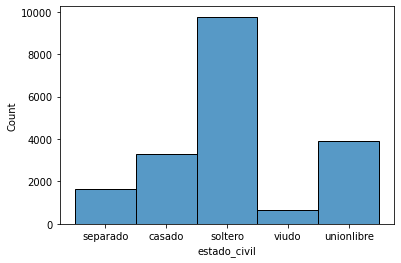

In [26]:
sns.histplot(data=df_salario,x='estado_civil')

estado_civil: La variable estado civil tiene un efecto en el salario ya que dependiendo su característica puede tener un mayor o menor salario debido a su caracterización. Se tendrá como grupo base casado.

In [30]:
df_salario=df_salario.replace(to_replace={'etnia':{1:'indigena'}},value=None)
df_salario=df_salario.replace(to_replace={'etnia':{2:'rom o gitano'}},value=None)
df_salario=df_salario.replace(to_replace={'etnia':{3:'raizal del archipielago'}},value=None)
df_salario=df_salario.replace(to_replace={'etnia':{4:'palenquero'}},value=None)
df_salario=df_salario.replace(to_replace={'etnia':{5:'negro-mulato(afro-descendiente)'}},value=None)
df_salario=df_salario.replace(to_replace={'etnia':{6:'blanco'}},value=None)
df_salario=df_salario.replace(to_replace={'etnia':{7:'mestizo'}},value=None)
df_salario=df_salario.replace(to_replace={'etnia':{8:'Ninguno_d_ante '}},value=None)
df_salario['etnia'].value_counts()

mestizo                            1005
Ninguno_d_ante                      964
blanco                              618
negro-mulato(afro-descendiente)     186
soltero                              82
palenquero                            2
raizal del archipielago               1
Name: etnia, dtype: int64

<AxesSubplot:xlabel='etnia', ylabel='count'>

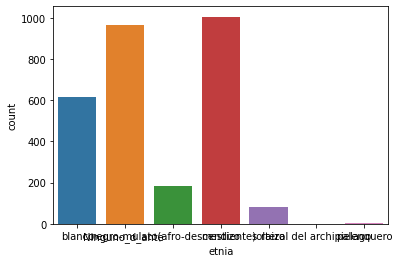

In [33]:
sns.countplot(data=df_salario,x='etnia')

<AxesSubplot:xlabel='anos_superior', ylabel='Count'>

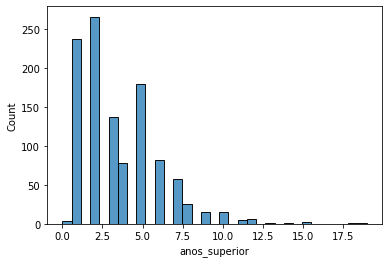

In [34]:
sns.histplot(data=df_salario,x='anos_superior')


anos_superior: La variable educación está íntimamente relacionada con el salario ya que a mayores años de estudio se tendrá mayor probabilidad de encontrar un mejor trabajo con mayor salario.

<AxesSubplot:xlabel='anos_trabaja', ylabel='Count'>

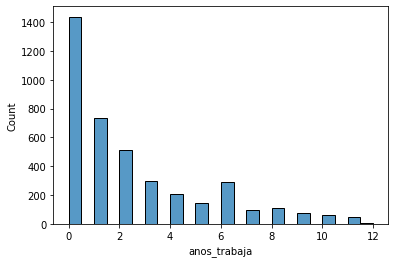

In [35]:
sns.histplot(data=df_salario,x='anos_trabaja')


anos_trabajo: La variable años trabajo podríamos tomarlo como un proxy de la experiencia ya que nos muestra la cantidad de años que lleva esta persona en el trabajo y es íntimamente relacionada con la variable salarios ya que, a mayores años de trabajar mayor salario, esta variable tiene un comportamiento diferente ya que habrá un punto de años donde empieza a disminuir por las condiciones laborales.

<AxesSubplot:xlabel='horas_normal', ylabel='Count'>

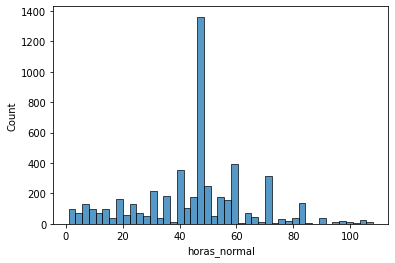

In [36]:
sns.histplot(data=df_salario,x='horas_normal')

horas_normal: La variable horas_normal es la cantidad de horas que trabaja una persona, el efecto que tiene en la variable salarios es que a mayores horas trabajadas mayor será el salario.

<AxesSubplot:xlabel='log_salario', ylabel='Count'>

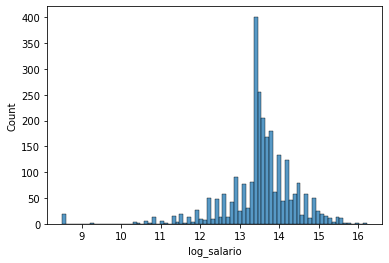

In [37]:
sns.histplot(data=df_salario,x='log_salario')


4) Realice el preprocesamiento necesario para  (por ejemplo, transformar en variables dummy las variables cualitativas, logaritmo sobre el salario, etc.)

In [44]:
#genera dummies de genero 
df_dummies = pd.get_dummies(df_salario.sexo, prefix='Sexo')
print(df_dummies.head())


   Sexo_F  Sexo_M
0       1       0
1       1       0
2       0       1
3       0       1
4       1       0


In [51]:
df_salario2=df_salario
df_salario2=df_salario2.assign(Sexo_F=df_dummies['Sexo_F'])
df_salario2=df_salario2.assign(Sexo_M=df_dummies['Sexo_M'])
df_salario2.head()

vr_salario  edad sexo estado_civil            etnia  anos_superior  \
0         NaN    60    F     separado              NaN            1.0   
1         NaN    40    F       casado           blanco            NaN   
2         NaN    67    M       casado           blanco            NaN   
3         NaN    22    M      soltero           blanco            NaN   
4         NaN    53    F        viudo  Ninguno_d_ante             NaN   

   anos_trabaja  horas_normal  log_salario  Sexo_F  Sexo_M  
0           2.0          30.0          NaN       1       0  
1           NaN           NaN          NaN       1       0  
2           NaN           NaN          NaN       0       1  
3           NaN           NaN          NaN       0       1  
4           NaN           NaN          NaN       1       0

In [53]:
#genera dummies de estadocivil 
df_dummies = pd.get_dummies(df_salario2.estado_civil, prefix='estado_civil')
df_salario2=df_salario2.assign(estado_civil_casado=df_dummies['estado_civil_casado'])
df_salario2=df_salario2.assign(estado_civil_separado=df_dummies['estado_civil_separado'])
df_salario2=df_salario2.assign(estado_civil_soltero=df_dummies['estado_civil_soltero'])
df_salario2=df_salario2.assign( estado_civil_unionlibre=df_dummies[' estado_civil_unionlibre'])
df_salario2=df_salario2.assign(estado_civil_viudo =df_dummies['estado_civil_viudo '])
df_salario2.head()

   estado_civil_casado  estado_civil_separado  estado_civil_soltero  \
0                    0                      1                     0   
1                    1                      0                     0   
2                    1                      0                     0   
3                    0                      0                     1   
4                    0                      0                     0   

   estado_civil_unionlibre  estado_civil_viudo  
0                        0                   0  
1                        0                   0  
2                        0                   0  
3                        0                   0  
4                        0                   1  


In [ ]:
from sklearn.preprocessing import OrdinalEncoder## Genera encoding de categoricas

ord_enc = OrdinalEncoder
df_salario['sexo_code']=ord_enc.fit_transform(df_salario[['sexo']])
df_salario['sexo_code']